In [103]:
import math, json, numpy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('contoh.csv')
cluster = []
for i in range(len(df['Cluster'])):
    cluster.append(df['Cluster'][i])
print(cluster)
count_cluster = []
for i in range(len(cluster)):
    cluster_name = cluster[i]
    if cluster[i] in count_cluster:
        print('',end='')
    else:
        count_cluster.append(cluster_name)

print(count_cluster)

cluster = []
random_1 = (1/len(count_cluster))/2
for i in range(len(df['Cluster'])):
    clus = []
    for j in range(len(count_cluster)):
        clus.append(random_1)
    cluster.append(clus)

print('')
print(cluster)


for i in range(len(df['Cluster'])):
    for j in range(len(count_cluster)):
        if df['Cluster'][i] == count_cluster[j]:
            cluster[i][j] = 1 - (random_1*2)
print('')
print(cluster)

file_name = 'cluster4.json'
output = open(file_name,"w")
output.write(str(cluster))
output.close()

['Ideal', 'Kurus', 'Ideal', 'Ideal', 'Gemuk', 'Ideal', 'Gemuk', 'Kurus', 'Ideal', 'Gemuk', 'Ideal', 'Gemuk', 'Ideal', 'Ideal', 'Gemuk', 'Ideal', 'Kurus', 'Ideal', 'Ideal', 'Kurus', 'Ideal', 'Ideal', 'Kurus', 'Ideal', 'Gemuk', 'Ideal', 'Ideal', 'Gemuk', 'Kurus', 'Ideal', 'Ideal']
['Ideal', 'Kurus', 'Gemuk']

[[0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.16666666666666666, 0.16666666666666666], [0.16666666666666666, 0.1666666666666666

In [104]:
atribut = []
for i in range(len(df.columns)):
    atribut.append(df.columns[i])
atribut.remove('Cluster')
# print(atribut)
data = []
for i in range(len(df[atribut[0]])):
    clus = []
    for j in range(len(atribut)):
        clus.append(df[atribut[j]][i])
    data.append(clus)
print(data)

file_name = 'data4.json'
output = open(file_name,"w")
output.write(str(data))
output.close()

[[150, 50], [151, 48], [152, 52], [153, 53], [154, 80], [155, 55], [156, 70], [157, 46], [158, 58], [159, 64], [160, 60], [161, 69], [162, 62], [163, 63], [164, 70], [165, 65], [166, 57], [167, 67], [168, 68], [169, 55], [170, 70], [171, 71], [172, 64], [173, 73], [174, 80], [175, 75], [176, 76], [177, 80], [178, 67], [179, 79], [180, 80]]


In [105]:
w         = 2.0
maxIter   = 100
errorRate = 0.0001

P = [0]
for i in range(maxIter+1):
    P.append(0)

selisih_arr = []

datanya = {"data": [], "cluster": []}
datanya['data'] = data
datanya['cluster'] = cluster

df2 = pd.DataFrame(data=datanya)
df2.head()

,data,cluster
0,"[150, 50]","[0.6666666666666667, 0.16666666666666666, 0.16..."
1,"[151, 48]","[0.16666666666666666, 0.6666666666666667, 0.16..."
2,"[152, 52]","[0.6666666666666667, 0.16666666666666666, 0.16..."
3,"[153, 53]","[0.6666666666666667, 0.16666666666666666, 0.16..."
4,"[154, 80]","[0.16666666666666666, 0.16666666666666666, 0.6..."


In [106]:
for iter in range(1,maxIter+1):
    print('Iterasi: '+str(iter)+'/'+str(maxIter))
    
    clusterW = []
    for i in range(len(cluster)):
        clus = []
        for j in range(len(cluster[0])):
            clus.append(0)
        clusterW.append(clus)
    clusterWX = []
    for h in range(len(data[0])):
        cluss = []
        for i in range(len(cluster)):
            clus = []
            for j in range(len(cluster[0])):
                clus.append(0)
            cluss.append(clus)
        clusterWX.append(cluss)
    for i in range(len(cluster)):
        for j in range(len(cluster[i])):
            clusterW[i][j] = cluster[i][j]**w
            for k in range(len(data[0])):
                clusterWX[k][i][j] = clusterW[i][j]*data[i][k]
#     print(clusterWX)
#     print('')


    sumClusterW = []
    sumClusterWX = []
    for i in range(len(cluster[0])):
        sumClusterW.append(0)
    for h in range(len(data[0])):
        clus = []
        for i in range(len(cluster[0])):
            clus.append(0)
        sumClusterWX.append(clus)
    for i in range(len(cluster)):
        for j in range(len(cluster[0])):
            sumClusterW[j] = sumClusterW[j] + clusterW[i][j]
#     print(sumClusterW)
#     print('')


    for i in range(len(cluster)):
        for j in range(len(cluster[i])):
            for k in range(len(data[0])):
                sumClusterWX[k][j] = sumClusterWX[k][j] + clusterWX[k][i][j]
#     print(sumClusterWX)
#     print('')


    pusatCluster = []
    for i in range(len(cluster[0])):
        clus = []
        for j in range(len(data[0])):
            clus.append(0)
        pusatCluster.append(clus)
    for i in range(len(sumClusterW)):
        for j in range(len(data[0])):
            pusatCluster[i][j] = sumClusterWX[j][i]/sumClusterW[i]
#     print(pusatCluster)
#     print('')


    VijminVkjWuik = []
    VijminVkjW = []
    for h in range(len(cluster[0])):
        clus = []
        for i in range(len(data)):
            cluss = []
            for j in range(len(data[0])):
                cluss.append(0)
            clus.append(cluss)
        VijminVkjWuik.append(clus)
        VijminVkjW.append(clus)
    for i in range(len(VijminVkjWuik)):
        for j in range(len(VijminVkjWuik[i])):
            for k in range(len(data[0])):
                VijminVkjW[i][j][k] = (data[j][k]-pusatCluster[i][k])**w
    for i in range(len(VijminVkjWuik)):
        for j in range(len(VijminVkjWuik[i])):
            for k in range(len(data[0])):
                VijminVkjWuik[i][j][k] = ((data[j][k]-pusatCluster[i][k])**w)*clusterW[j][i]

#     print(VijminVkjW)
#     print('')
#     print(VijminVkjWuik)
#     print('')


    X = []
    for i in range(len(data[0])):
        X.append(0)
    for i in range(len(VijminVkjWuik)):
        for j in range(len(VijminVkjWuik[i])):
            for k in range(len(data[0])):
                X[k] = X[k] + VijminVkjWuik[i][j][k]
#     print(X)
#     print('')
    for k in range(len(data[0])):
        P[iter] = P[iter]+X[k]
#     print(P)
#     print('')


    summ = []
    for i in range(len(data)):
        clus = []
        for j in range(len(cluster[0])):
            clus.append(0)
        summ.append(clus)
    for i in range(len(summ[0])):
        for j in range(len(summ)):
            counter = 0
            for k in range(len(data[0])):
                counter = counter + (data[j][k]-pusatCluster[i][k])**w
            summ[j][i] = counter**-1 # ganti jadi -1

#     print(summ)
#     print('')

    total = []
    for i in range(len(data)):
        total.append(0)
    for i in range(len(total)):
        for j in range(len(cluster[0])):
            total[i] = total[i] + summ[i][j]
#     print(total)
#     print('')
    for i in range(len(summ[0])):
        for j in range(len(summ)):
            cluster[j][i] = summ[j][i]/total[j]

#     print(cluster)

            
    selisih = math.sqrt(math.pow(P[iter]-P[iter-1], 2))
    selisih_arr.append(selisih)
    stop_iter = iter
    
    print('P '+str(iter)+': '+str(P[iter]), end='')
    print(' - P'+str(iter-1)+': '+str(P[iter-1]), end='')
    print(' - Selisih: '+str(selisih)+'\n')
    if selisih <= errorRate:
        break

Iterasi: 1/100
P 1: 2466.023231183692 - P0: 0 - Selisih: 2466.023231183692

Iterasi: 2/100
P 2: 1619.2738424242318 - P1: 2466.023231183692 - Selisih: 846.7493887594603

Iterasi: 3/100
P 3: 1267.1246821100158 - P2: 1619.2738424242318 - Selisih: 352.14916031421603

Iterasi: 4/100
P 4: 991.44007696515 - P3: 1267.1246821100158 - Selisih: 275.6846051448658

Iterasi: 5/100
P 5: 887.5588415000602 - P4: 991.44007696515 - Selisih: 103.88123546508973

Iterasi: 6/100
P 6: 860.863544020366 - P5: 887.5588415000602 - Selisih: 26.695297479694204

Iterasi: 7/100
P 7: 854.8205176141421 - P6: 860.863544020366 - Selisih: 6.04302640622393

Iterasi: 8/100
P 8: 853.3159526309951 - P7: 854.8205176141421 - Selisih: 1.50456498314702

Iterasi: 9/100
P 9: 852.8677132142656 - P8: 853.3159526309951 - Selisih: 0.44823941672950696

Iterasi: 10/100
P 10: 852.7139386189385 - P9: 852.8677132142656 - Selisih: 0.15377459532703597

Iterasi: 11/100
P 11: 852.6570233973523 - P10: 852.7139386189385 - Selisih: 0.0569152215862

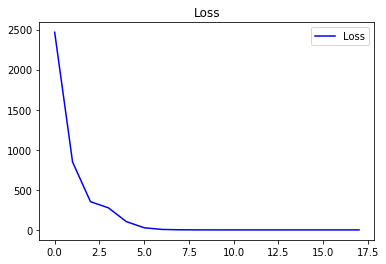

In [107]:
plt.plot(range(iter), selisih_arr, 'b', label='Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [108]:
for i in range(len(data)):
    hasil = ''
    print('data '+str(i+1)+': '+str(data[i]), end='')
    for j in range(len(cluster[0])):
        if cluster[i][j]>=0.5:
            hasil = j+1
            print(' - cluster: '+str(hasil), end='')
            print(' - persentase: '+str(math.floor(cluster[i][hasil-1]*10000)/100)+'%',end='')
#     +' Klaster: '+str(hasil)+' Persentase: '+str(math.floor(cluster[i][hasil-1]*10000)/100)+'%')
    print('')

data 1: [150, 50] - cluster: 2 - persentase: 94.77%
data 2: [151, 48] - cluster: 2 - persentase: 93.9%
data 3: [152, 52] - cluster: 2 - persentase: 98.71%
data 4: [153, 53] - cluster: 2 - persentase: 99.1%
data 5: [154, 80]
data 6: [155, 55] - cluster: 2 - persentase: 93.06%
data 7: [156, 70] - cluster: 1 - persentase: 69.52%
data 8: [157, 46] - cluster: 2 - persentase: 87.62%
data 9: [158, 58] - cluster: 2 - persentase: 58.22%
data 10: [159, 64] - cluster: 1 - persentase: 83.34%
data 11: [160, 60] - cluster: 1 - persentase: 66.6%
data 12: [161, 69] - cluster: 1 - persentase: 87.88%
data 13: [162, 62] - cluster: 1 - persentase: 88.84%
data 14: [163, 63] - cluster: 1 - persentase: 95.2%
data 15: [164, 70] - cluster: 1 - persentase: 85.17%
data 16: [165, 65] - cluster: 1 - persentase: 98.69%
data 17: [166, 57] - cluster: 1 - persentase: 62.51%
data 18: [167, 67] - cluster: 1 - persentase: 89.52%
data 19: [168, 68] - cluster: 1 - persentase: 79.51%
data 20: [169, 55] - cluster: 1 - persen

In [109]:
for i in range(len(data)):
    hasil = ''
    print('data '+str(i+1)+': '+str(data[i]), end='')
    for j in range(len(cluster[0])):
        if cluster[i][j]>=0.5:
            hasil = j+1
            print(' - cluster: '+str(count_cluster[hasil-1]), end='')
            print(' - sebelumnya: '+str(df['Cluster'][i]), end='')
            print(' - persentase: '+str(math.floor(cluster[i][hasil-1]*10000)/100)+'%',end='')
    print('')

data 1: [150, 50] - cluster: Kurus - sebelumnya: Ideal - persentase: 94.77%
data 2: [151, 48] - cluster: Kurus - sebelumnya: Kurus - persentase: 93.9%
data 3: [152, 52] - cluster: Kurus - sebelumnya: Ideal - persentase: 98.71%
data 4: [153, 53] - cluster: Kurus - sebelumnya: Ideal - persentase: 99.1%
data 5: [154, 80]
data 6: [155, 55] - cluster: Kurus - sebelumnya: Ideal - persentase: 93.06%
data 7: [156, 70] - cluster: Ideal - sebelumnya: Gemuk - persentase: 69.52%
data 8: [157, 46] - cluster: Kurus - sebelumnya: Kurus - persentase: 87.62%
data 9: [158, 58] - cluster: Kurus - sebelumnya: Ideal - persentase: 58.22%
data 10: [159, 64] - cluster: Ideal - sebelumnya: Gemuk - persentase: 83.34%
data 11: [160, 60] - cluster: Ideal - sebelumnya: Ideal - persentase: 66.6%
data 12: [161, 69] - cluster: Ideal - sebelumnya: Gemuk - persentase: 87.88%
data 13: [162, 62] - cluster: Ideal - sebelumnya: Ideal - persentase: 88.84%
data 14: [163, 63] - cluster: Ideal - sebelumnya: Ideal - persentase:

In [110]:
print(cluster[4])

[0.4906564265921939, 0.19059134800293392, 0.3187522254048723]
